In [1]:
# Declaración de la semilla
seed = 161
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import nltk
nltk.download('vader_lexicon')
import numpy as np
np.random.seed(seed)
import sys

import re, string, unicodedata
#Sentiment-Analysis
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.impute import SimpleImputer


#Para crear GaussianNB
from sklearn.naive_bayes import GaussianNB
#Para craer Support Vector Machine
from sklearn.svm import SVC

# Para preparar los datos
# ------------------------

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn import tree as tr
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#KMEANS
from sklearn.cluster import KMeans

#multiclass
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import make_classification


#Librerías para la visualización
# -------------------------
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Se cargan los datos. 
df_emociones=pd.read_csv('ProyectoDatos.txt', sep=';', encoding = 'utf-8')

In [3]:
df_emociones.shape

(16000, 2)

In [4]:
df_emociones.head()

,Comentario,Emocion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df_emociones.dtypes

Comentario    object
Emocion       object
dtype: object

In [6]:
df_emociones.describe()

,Comentario,Emocion
count,16000,16000
unique,15969,6
top,i shy away from songs that talk about how i fe...,joy
freq,2,5362


In [7]:
df_emociones.isnull().sum().sort_values()

Comentario    0
Emocion       0
dtype: int64

In [8]:
df_emociones_t = df_emociones.copy()

In [9]:
df_emociones_t = df_emociones_t.dropna()
df_emociones_t = df_emociones_t.drop_duplicates()

In [10]:
df_emociones_t['Emocion'].describe()

count     15999
unique        6
top         joy
freq       5361
Name: Emocion, dtype: object

In [11]:
pd.value_counts(df_emociones_t['Emocion'])

joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emocion, dtype: int64

In [12]:
df_emociones_t['Emocion'].replace(to_replace = ['joy'], value = '1', inplace = True)
df_emociones_t['Emocion'].replace(to_replace = ['sadness'], value = '2', inplace = True)
df_emociones_t['Emocion'].replace(to_replace = ['anger'], value = '3', inplace = True)
df_emociones_t['Emocion'].replace(to_replace = ['fear'], value = '4', inplace = True)
df_emociones_t['Emocion'].replace(to_replace = ['love'], value = '5', inplace = True)
df_emociones_t['Emocion'].replace(to_replace = ['surprise'], value = '6', inplace = True)

In [13]:
df_emociones_t['Emocion'] = pd.to_numeric(df_emociones_t.Emocion, errors = 'coerce')

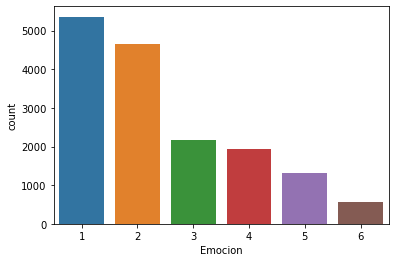

In [14]:
ax = sns.countplot(x='Emocion', data=df_emociones_t)

In [15]:
df_emociones_t2 = df_emociones_t.copy()
sid = SentimentIntensityAnalyzer()
df_emociones_t2["CompoundSentimentAnalyzer"] = df_emociones_t2['Comentario'].apply(lambda i: sid.polarity_scores(i)['compound'])
df_emociones_t2["PositiveSentimentAnalyzer"] = df_emociones_t2['Comentario'].apply(lambda i: sid.polarity_scores(i)['pos'])
df_emociones_t2["NegativeSentimentAnalyzer"] = df_emociones_t2['Comentario'].apply(lambda i: sid.polarity_scores(i)['neg'])
df_emociones_t2["NeutralSentimentAnalyzer"] = df_emociones_t2['Comentario'].apply(lambda i: sid.polarity_scores(i)['neu'])

In [16]:
df_emociones_t2

,Comentario,Emocion,CompoundSentimentAnalyzer,PositiveSentimentAnalyzer,NegativeSentimentAnalyzer,NeutralSentimentAnalyzer
0,i didnt feel humiliated,2,0.2584,0.504,0.000,0.496
1,i can go from feeling so hopeless to so damned...,2,0.0821,0.271,0.227,0.503
2,im grabbing a minute to post i feel greedy wrong,3,-0.6597,0.000,0.474,0.526
3,i am ever feeling nostalgic about the fireplac...,5,0.1280,0.091,0.000,0.909
4,i am feeling grouchy,3,-0.3400,0.278,0.537,0.185
...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,2,-0.0772,0.112,0.126,0.762
15996,i am now turning and i feel pathetic that i am...,2,-0.5719,0.000,0.198,0.802
15997,i feel strong and good overall,1,0.7351,0.674,0.000,0.326
15998,i feel like this was such a rude comment and i...,3,0.3612,0.333,0.182,0.485


In [17]:
df_emociones_t2["Polarity"] = df_emociones_t2['Comentario'].apply(lambda i: TextBlob(i).sentiment[0])
df_emociones_t2["Subectivity"] = df_emociones_t2['Comentario'].apply(lambda i: TextBlob(i).sentiment[1])
df_emociones_t2

,Comentario,Emocion,CompoundSentimentAnalyzer,PositiveSentimentAnalyzer,NegativeSentimentAnalyzer,NeutralSentimentAnalyzer,Polarity,Subectivity
0,i didnt feel humiliated,2,0.2584,0.504,0.000,0.496,0.000000,0.000000
1,i can go from feeling so hopeless to so damned...,2,0.0821,0.271,0.227,0.503,0.000000,0.000000
2,im grabbing a minute to post i feel greedy wrong,3,-0.6597,0.000,0.474,0.526,-0.500000,0.900000
3,i am ever feeling nostalgic about the fireplac...,5,0.1280,0.091,0.000,0.909,-0.500000,1.000000
4,i am feeling grouchy,3,-0.3400,0.278,0.537,0.185,0.000000,0.000000
...,...,...,...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,2,-0.0772,0.112,0.126,0.762,0.000000,0.433333
15996,i am now turning and i feel pathetic that i am...,2,-0.5719,0.000,0.198,0.802,-1.000000,1.000000
15997,i feel strong and good overall,1,0.7351,0.674,0.000,0.326,0.377778,0.444444
15998,i feel like this was such a rude comment and i...,3,0.3612,0.333,0.182,0.485,0.066667,0.700000


In [18]:
df_num = df_emociones_t2.select_dtypes(['number']).copy()
#df_num=df_num.drop('Emocion', axis=1)
df_num.dtypes

Emocion                        int64
CompoundSentimentAnalyzer    float64
PositiveSentimentAnalyzer    float64
NegativeSentimentAnalyzer    float64
NeutralSentimentAnalyzer     float64
Polarity                     float64
Subectivity                  float64
dtype: object

In [19]:
df_final = df_num 
df_final

,Emocion,CompoundSentimentAnalyzer,PositiveSentimentAnalyzer,NegativeSentimentAnalyzer,NeutralSentimentAnalyzer,Polarity,Subectivity
0,2,0.2584,0.504,0.000,0.496,0.000000,0.000000
1,2,0.0821,0.271,0.227,0.503,0.000000,0.000000
2,3,-0.6597,0.000,0.474,0.526,-0.500000,0.900000
3,5,0.1280,0.091,0.000,0.909,-0.500000,1.000000
4,3,-0.3400,0.278,0.537,0.185,0.000000,0.000000
...,...,...,...,...,...,...,...
15995,2,-0.0772,0.112,0.126,0.762,0.000000,0.433333
15996,2,-0.5719,0.000,0.198,0.802,-1.000000,1.000000
15997,1,0.7351,0.674,0.000,0.326,0.377778,0.444444
15998,3,0.3612,0.333,0.182,0.485,0.066667,0.700000


NORMALIZACIÓN DATOS

In [20]:
selected_cols = df_final[['CompoundSentimentAnalyzer', 'PositiveSentimentAnalyzer', 'NegativeSentimentAnalyzer', 'NeutralSentimentAnalyzer', 
                'Polarity', 'Subectivity']].values
scaler = MinMaxScaler()
scaler.fit(selected_cols)
df_final[['CompoundSentimentAnalyzer', 'PositiveSentimentAnalyzer', 'NegativeSentimentAnalyzer', 'NeutralSentimentAnalyzer', 
                'Polarity', 'Subectivity']] = scaler.transform(selected_cols)
df_final

,Emocion,CompoundSentimentAnalyzer,PositiveSentimentAnalyzer,NegativeSentimentAnalyzer,NeutralSentimentAnalyzer,Polarity,Subectivity
0,2,0.631076,0.504,0.000000,0.496,0.500000,0.000000
1,2,0.541525,0.271,0.239451,0.503,0.500000,0.000000
2,3,0.164728,0.000,0.500000,0.526,0.250000,0.900000
3,5,0.564840,0.091,0.000000,0.909,0.250000,1.000000
4,3,0.327119,0.278,0.566456,0.185,0.500000,0.000000
...,...,...,...,...,...,...,...
15995,2,0.460609,0.112,0.132911,0.762,0.500000,0.433333
15996,2,0.209326,0.000,0.208861,0.802,0.000000,1.000000
15997,1,0.873216,0.674,0.000000,0.326,0.688889,0.444444
15998,3,0.683294,0.333,0.191983,0.485,0.533333,0.700000


# CREACION MODELO MULTI CLASS DE CLASIFICACIÓN ONE VS ONE BASADO EN SUPPORT VECTOR MACHINE

In [21]:
#Definimos los conjuntos X y Y del modelo
Y = df_final['Emocion']
X = df_final.drop(['Emocion'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
svm_model = SVC(random_state=seed)

In [22]:
#Búsqueda de hiperparámetros para Gaussian Naive Bayes
svm_particiones = KFold(n_splits=10, shuffle=True, random_state = seed) 
svm_param_grid = {'kernel':['linear','rbf'],'gamma':['scale','auto']}

svm_best_model = GridSearchCV(svm_model, svm_param_grid, cv=svm_particiones)

svm_best_model.fit(X_train,Y_train)

svm_best_model.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [23]:
svm_best_model.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [24]:
final_svm = svm_best_model.best_estimator_

In [25]:
#Entrenamos el modelo
ovo = OneVsOneClassifier(final_svm)
ovo.fit(X_train, Y_train)
Y_pred = ovo.predict(X_test)

In [26]:
#Hacemos las predicciones
y_pred_train = ovo.predict(X_train)
y_pred_test = ovo.predict(X_test)
print('Exactitud sobre entrenamiento: %.3f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.3f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.534
Exactitud sobre test: 0.525


In [27]:
confusion_matrix(Y_test, Y_pred)

array([[890, 153,   0,   0,   0,   0],
       [152, 788,   0,   0,   0,   0],
       [ 76, 371,   3,   0,   1,   0],
       [ 81, 280,   1,   0,   0,   0],
       [223,  65,   0,   0,   0,   0],
       [ 74,  42,   0,   0,   0,   0]], dtype=int64)

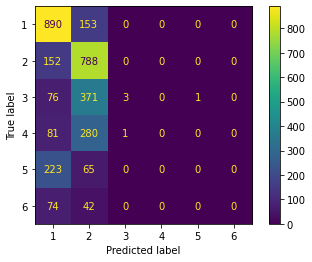

In [28]:
plot_confusion_matrix(ovo, X_test, Y_test)  
plt.show()

In [29]:
print('Exactitud: %.2f' % accuracy_score(Y_test, Y_pred))
print("Recall: {}".format(recall_score(Y_test,Y_pred, average='macro', zero_division=1)))
print("Precisión: {}".format(precision_score(Y_test,Y_pred, average='macro', zero_division=1)))
print("Puntuación F1: {}".format(f1_score(Y_test,Y_pred, average='macro', zero_division=1)))

Exactitud: 0.53
Recall: 0.2830429205167558
Precisión: 0.6347870037843378
Puntuación F1: 0.21857435525319976


In [30]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, Y_pred, zero_division = 1))

              precision    recall  f1-score   support

           1       0.59      0.85      0.70      1043
           2       0.46      0.84      0.60       940
           3       0.75      0.01      0.01       451
           4       1.00      0.00      0.00       362
           5       0.00      0.00      0.00       288
           6       1.00      0.00      0.00       116

    accuracy                           0.53      3200
   macro avg       0.63      0.28      0.22      3200
weighted avg       0.59      0.53      0.41      3200



# CREACION DE UN MODELO DE CLASIFICACIÓN GAUSSIAN NAIVE BAYES POR SENTIMIENTO (6)

In [31]:
df_num = df_final.select_dtypes(['number']).copy()
df_num.dtypes

Emocion                        int64
CompoundSentimentAnalyzer    float64
PositiveSentimentAnalyzer    float64
NegativeSentimentAnalyzer    float64
NeutralSentimentAnalyzer     float64
Polarity                     float64
Subectivity                  float64
dtype: object

In [32]:
nv = GaussianNB()

## Perfilamiento de los datos para crear 6 dataframes distintos donde haya una columna binaria por sentimiento 

In [33]:
df_joy = df_num.copy()
df_joy['emocion'] = np.where(df_joy['Emocion']==1,1, 0)
df_joy = df_joy.drop(['Emocion'], axis=1)

In [34]:
df_sadness = df_num.copy()
df_sadness['emocion'] = np.where(df_sadness['Emocion']==2,1, 0)
df_sadness = df_sadness.drop(['Emocion'], axis=1)

In [35]:
df_anger = df_num.copy()
df_anger['emocion'] = np.where(df_anger['Emocion']==3,1, 0)
df_anger = df_anger.drop(['Emocion'], axis=1)

In [36]:
df_fear = df_num.copy()
df_fear['emocion'] = np.where(df_fear['Emocion']==4,1, 0)
df_fear = df_fear.drop(['Emocion'], axis=1)

In [37]:
df_love = df_num.copy()
df_love['emocion'] = np.where(df_love['Emocion']==5,1, 0)
df_love = df_love.drop(['Emocion'], axis=1)

In [38]:
df_surprise = df_num.copy()
df_surprise['emocion'] = np.where(df_surprise['Emocion']==6,1, 0)
df_surprise = df_surprise.drop(['Emocion'], axis=1)

## Creación modelo Gaussian Naive Bayes por cada sentimiento

### Sentimiento Joy

In [39]:
Y_joy = df_joy['emocion']
X_joy = df_joy.drop(['emocion'], axis=1)
X_train_joy, X_test_joy, Y_train_joy, Y_test_joy = train_test_split(X_joy, Y_joy, test_size=0.2, random_state=seed)
#Búsqueda de hiperparámetros
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=1, random_state=seed)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB_joy = GridSearchCV(estimator=nv, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB_joy.fit(X_train_joy, Y_train_joy)
gs_NB_joy.best_params_
gFinalMode_joy = gs_NB_joy.best_estimator_
Y_pred_joy = gFinalMode_joy.predict(X_test_joy)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [40]:
y_pred_train_joy = gFinalMode_joy.predict(X_train_joy)
y_pred_test_joy = gFinalMode_joy.predict(X_test_joy)
print('Exactitud sobre entrenamiento: %.3f' % accuracy_score(Y_train_joy, y_pred_train_joy))
print('Exactitud sobre test: %.3f' % accuracy_score(Y_test_joy, y_pred_test_joy))

Exactitud sobre entrenamiento: 0.794
Exactitud sobre test: 0.778


In [41]:
confusion_matrix(Y_test_joy, Y_pred_joy)

array([[1690,  467],
       [ 244,  799]], dtype=int64)

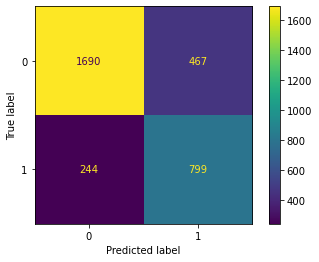

In [42]:
plot_confusion_matrix(gFinalMode_joy, X_test_joy, Y_test_joy)  
plt.show()

In [43]:
# Mostrar reporte de clasificación
print(classification_report(Y_test_joy, Y_pred_joy))

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      2157
           1       0.63      0.77      0.69      1043

    accuracy                           0.78      3200
   macro avg       0.75      0.77      0.76      3200
weighted avg       0.79      0.78      0.78      3200



In [44]:
print('Exactitud: %.2f' % accuracy_score(Y_test_joy, Y_pred_joy))
print("Recall: {}".format(recall_score(Y_test_joy,Y_pred_joy)))
print("Precisión: {}".format(precision_score(Y_test_joy,Y_pred_joy)))
print("Puntuación F1: {}".format(f1_score(Y_test_joy,Y_pred_joy)))

Exactitud: 0.78
Recall: 0.7660594439117929
Precisión: 0.6311216429699842
Puntuación F1: 0.6920744911216977


### Sentimiento Sadness

In [45]:
Y_sadness = df_sadness['emocion']
X_sadness = df_sadness.drop(['emocion'], axis=1)
X_train_sadness, X_test_sadness, Y_train_sadness, Y_test_sadness = train_test_split(X_sadness, Y_sadness, test_size=0.2, random_state=seed)
#Búsqueda de hiperparámetros
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=1, random_state=seed)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB_sadness = GridSearchCV(estimator=nv, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB_sadness.fit(X_train_sadness, Y_train_sadness)
gs_NB_sadness.best_params_
gFinalMode_sadness = gs_NB_sadness.best_estimator_
Y_pred_sadness = gFinalMode_sadness.predict(X_test_sadness)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [46]:
y_pred_train_sadness = gFinalMode_sadness.predict(X_train_sadness)
y_pred_test_sadness = gFinalMode_sadness.predict(X_test_sadness)
print('Exactitud sobre entrenamiento: %.3f' % accuracy_score(Y_train_sadness, y_pred_train_sadness))
print('Exactitud sobre test: %.3f' % accuracy_score(Y_test_sadness, y_pred_test_sadness))

Exactitud sobre entrenamiento: 0.723
Exactitud sobre test: 0.721


In [47]:
confusion_matrix(Y_test_sadness, Y_pred_sadness)

array([[1940,  320],
       [ 573,  367]], dtype=int64)

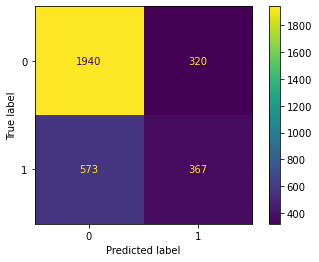

In [48]:
plot_confusion_matrix(gFinalMode_sadness, X_test_sadness, Y_test_sadness)  
plt.show()

In [49]:
# Mostrar reporte de clasificación
print(classification_report(Y_test_sadness, Y_pred_sadness, zero_division=1))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2260
           1       0.53      0.39      0.45       940

    accuracy                           0.72      3200
   macro avg       0.65      0.62      0.63      3200
weighted avg       0.70      0.72      0.71      3200



In [50]:
print('Exactitud: %.2f' % accuracy_score(Y_test_sadness, Y_pred_sadness))
print("Recall: {}".format(recall_score(Y_test_sadness,Y_pred_sadness)))
print("Precisión: {}".format(precision_score(Y_test_sadness,Y_pred_sadness)))
print("Puntuación F1: {}".format(f1_score(Y_test_sadness,Y_pred_sadness)))

Exactitud: 0.72
Recall: 0.3904255319148936
Precisión: 0.5342066957787481
Puntuación F1: 0.4511370620774431


### Sentimiento Anger

In [51]:
Y_anger = df_anger['emocion']
X_anger = df_anger.drop(['emocion'], axis=1)
X_train_anger, X_test_anger, Y_train_anger, Y_test_anger = train_test_split(X_anger, Y_anger, test_size=0.2, random_state=seed)
#Búsqueda de hiperparámetros
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=1, random_state=seed)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB_anger = GridSearchCV(estimator=nv, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB_anger.fit(X_train_anger, Y_train_anger)
gs_NB_anger.best_params_
gFinalMode_anger = gs_NB_anger.best_estimator_
Y_pred_anger = gFinalMode_anger.predict(X_test_anger)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [52]:
y_pred_train_anger = gFinalMode_anger.predict(X_train_anger)
y_pred_test_anger = gFinalMode_anger.predict(X_test_anger)
print('Exactitud sobre entrenamiento: %.3f' % accuracy_score(Y_train_anger, y_pred_train_anger))
print('Exactitud sobre test: %.3f' % accuracy_score(Y_test_anger, y_pred_test_anger))

Exactitud sobre entrenamiento: 0.867
Exactitud sobre test: 0.859


In [53]:
confusion_matrix(Y_test_anger, Y_pred_anger)

array([[2749,    0],
       [ 451,    0]], dtype=int64)

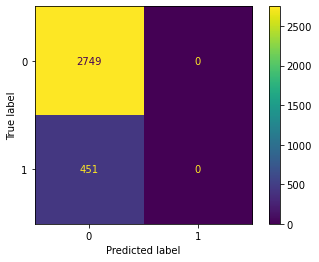

In [54]:
plot_confusion_matrix(gFinalMode_anger, X_test_anger, Y_test_anger)  
plt.show()

In [55]:
# Mostrar reporte de clasificación
print(classification_report(Y_test_anger, Y_pred_anger, zero_division=1))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2749
           1       1.00      0.00      0.00       451

    accuracy                           0.86      3200
   macro avg       0.93      0.50      0.46      3200
weighted avg       0.88      0.86      0.79      3200



In [56]:
print('Exactitud: %.2f' % accuracy_score(Y_test_anger, Y_pred_anger))
print("Recall: {}".format(recall_score(Y_test_anger,Y_pred_anger)))
print("Precisión: {}".format(precision_score(Y_test_anger,Y_pred_anger, zero_division=1)))
print("Puntuación F1: {}".format(f1_score(Y_test_anger,Y_pred_anger)))

Exactitud: 0.86
Recall: 0.0
Precisión: 1.0
Puntuación F1: 0.0


### Sentimiento Fear

In [57]:
Y_fear = df_fear['emocion']
X_fear = df_fear.drop(['emocion'], axis=1)
X_train_fear, X_test_fear, Y_train_fear, Y_test_fear = train_test_split(X_fear, Y_fear, test_size=0.2, random_state=seed)
#Búsqueda de hiperparámetros
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=1, random_state=seed)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB_fear = GridSearchCV(estimator=nv, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB_fear.fit(X_train_fear, Y_train_fear)
gs_NB_fear.best_params_
gFinalMode_fear = gs_NB_fear.best_estimator_
Y_pred_fear = gFinalMode_fear.predict(X_test_fear)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [58]:
y_pred_train_fear = gFinalMode_fear.predict(X_train_fear)
y_pred_test_fear = gFinalMode_fear.predict(X_test_fear)
print('Exactitud sobre entrenamiento: %.3f' % accuracy_score(Y_train_fear, y_pred_train_fear))
print('Exactitud sobre test: %.3f' % accuracy_score(Y_test_fear, y_pred_test_fear))

Exactitud sobre entrenamiento: 0.877
Exactitud sobre test: 0.887


In [59]:
confusion_matrix(Y_test_fear, Y_pred_fear)

array([[2838,    0],
       [ 362,    0]], dtype=int64)

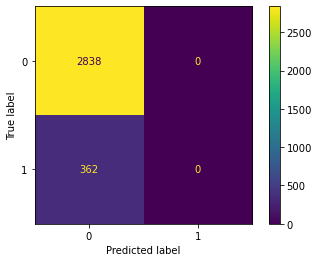

In [60]:
plot_confusion_matrix(gFinalMode_fear, X_test_fear, Y_test_fear)  
plt.show()

In [61]:
# Mostrar reporte de clasificación
print(classification_report(Y_test_fear, Y_pred_fear, zero_division=1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2838
           1       1.00      0.00      0.00       362

    accuracy                           0.89      3200
   macro avg       0.94      0.50      0.47      3200
weighted avg       0.90      0.89      0.83      3200



In [62]:
print('Exactitud: %.2f' % accuracy_score(Y_test_fear, Y_pred_fear))
print("Recall: {}".format(recall_score(Y_test_fear,Y_pred_fear)))
print("Precisión: {}".format(precision_score(Y_test_fear,Y_pred_fear, zero_division=1)))
print("Puntuación F1: {}".format(f1_score(Y_test_fear,Y_pred_fear)))

Exactitud: 0.89
Recall: 0.0
Precisión: 1.0
Puntuación F1: 0.0


### Sentimiento Love

In [63]:
Y_love = df_love['emocion']
X_love = df_love.drop(['emocion'], axis=1)
X_train_love, X_test_love, Y_train_love, Y_test_love = train_test_split(X_love, Y_love, test_size=0.2, random_state=seed)
#Búsqueda de hiperparámetros
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=1, random_state=seed)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB_love = GridSearchCV(estimator=nv, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB_love.fit(X_train_love, Y_train_love)
gs_NB_love.best_params_
gFinalMode_love = gs_NB_love.best_estimator_
Y_pred_love = gFinalMode_love.predict(X_test_love)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [64]:
y_pred_train_love = gFinalMode_love.predict(X_train_love)
y_pred_test_love = gFinalMode_love.predict(X_test_love)
print('Exactitud sobre entrenamiento: %.3f' % accuracy_score(Y_train_love, y_pred_train_love))
print('Exactitud sobre test: %.3f' % accuracy_score(Y_test_love, y_pred_test_love))

Exactitud sobre entrenamiento: 0.921
Exactitud sobre test: 0.910


In [65]:
confusion_matrix(Y_test_love, Y_pred_love)

array([[2912,    0],
       [ 288,    0]], dtype=int64)

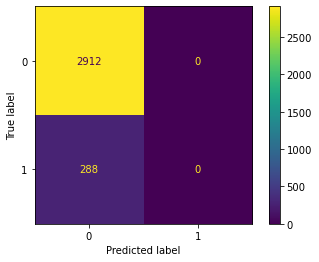

In [66]:
plot_confusion_matrix(gFinalMode_love, X_test_love, Y_test_love)  
plt.show()

In [67]:
# Mostrar reporte de clasificación
print(classification_report(Y_test_love, Y_pred_love, zero_division=1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2912
           1       1.00      0.00      0.00       288

    accuracy                           0.91      3200
   macro avg       0.96      0.50      0.48      3200
weighted avg       0.92      0.91      0.87      3200



In [68]:
print('Exactitud: %.2f' % accuracy_score(Y_test_love, Y_pred_love))
print("Recall: {}".format(recall_score(Y_test_love,Y_pred_love)))
print("Precisión: {}".format(precision_score(Y_test_love,Y_pred_love, zero_division=1)))
print("Puntuación F1: {}".format(f1_score(Y_test_love,Y_pred_love)))

Exactitud: 0.91
Recall: 0.0
Precisión: 1.0
Puntuación F1: 0.0


### Sentimiento Surprise

In [69]:
Y_surprise = df_surprise['emocion']
X_surprise = df_surprise.drop(['emocion'], axis=1)
X_train_surprise, X_test_surprise, Y_train_surprise, Y_test_surprise = train_test_split(X_surprise, Y_surprise, test_size=0.2, random_state=seed)
#Búsqueda de hiperparámetros
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=10,  n_repeats=1, random_state=seed)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB_surprise = GridSearchCV(estimator=nv, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB_surprise.fit(X_train_surprise, Y_train_surprise)
gs_NB_surprise.best_params_
gFinalMode_surprise = gs_NB_surprise.best_estimator_
Y_pred_surprise = gFinalMode_surprise.predict(X_test_surprise)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [70]:
y_pred_train_surprise = gFinalMode_surprise.predict(X_train_surprise)
y_pred_test_surprise = gFinalMode_surprise.predict(X_test_surprise)
print('Exactitud sobre entrenamiento: %.3f' % accuracy_score(Y_train_surprise, y_pred_train_surprise))
print('Exactitud sobre test: %.3f' % accuracy_score(Y_test_surprise, y_pred_test_surprise))

Exactitud sobre entrenamiento: 0.964
Exactitud sobre test: 0.964


In [71]:
confusion_matrix(Y_test_surprise, Y_pred_surprise)

array([[3084,    0],
       [ 116,    0]], dtype=int64)

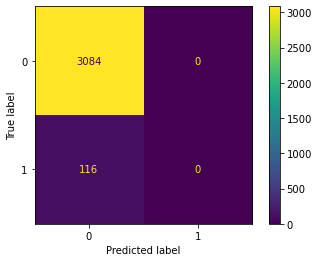

In [72]:
plot_confusion_matrix(gFinalMode_surprise, X_test_surprise, Y_test_surprise)  
plt.show()

In [73]:
# Mostrar reporte de clasificación
print(classification_report(Y_test_surprise, Y_pred_surprise, zero_division=1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3084
           1       1.00      0.00      0.00       116

    accuracy                           0.96      3200
   macro avg       0.98      0.50      0.49      3200
weighted avg       0.97      0.96      0.95      3200



In [74]:
print('Exactitud: %.2f' % accuracy_score(Y_test_surprise, Y_pred_surprise))
print("Recall: {}".format(recall_score(Y_test_surprise,Y_pred_surprise)))
print("Precisión: {}".format(precision_score(Y_test_surprise,Y_pred_surprise,zero_division=1)))
print("Puntuación F1: {}".format(f1_score(Y_test_surprise,Y_pred_surprise)))

Exactitud: 0.96
Recall: 0.0
Precisión: 1.0
Puntuación F1: 0.0


# CREACION MODELO MULTI CLASS DE CLASIFICACIÓN ONE VS REST BASADO EN ÁRBOLES

In [75]:
# Se selecciona la variable objetivo, en este caso "Popularity_label".
Y_tree = df_final['Emocion']
# Del conjunto de datos se elimina la variable "Popularity_label"
X_tree = df_final.drop(['Emocion'], axis=1)

X_train_tree, X_test_tree, Y_train_tree, Y_test_tree = train_test_split(X_tree, Y_tree, test_size=0.2, random_state=seed)

In [76]:
#mos el modelo sin ningún valor de estos hiperparámetros
tree = DecisionTreeClassifier(random_state=seed)

In [77]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = seed)

In [78]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[3,4,5,6,7,8,9,10],'min_samples_split':[2, 3, 4, 5,6,7,8,9]}

In [79]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
best_model_tree = GridSearchCV(tree, param_grid, cv=particiones)
# Ajuste del modelo
best_model_tree.fit(X_train_tree, Y_train_tree)

GridSearchCV(cv=KFold(n_splits=10, random_state=161, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=161),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [80]:
# Podemos ver cuál fue el resultado de la búsqueda (mejores valores de hiperparámetros)
best_model_tree.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}

In [81]:
# Obtener el mejor modelo.
final_tree = best_model_tree.best_estimator_


In [82]:
#Entrenamos el modelo
ovr = OneVsRestClassifier(final_tree)
ovr.fit(X_train_tree, Y_train_tree)
Y_pred_tree = ovr.predict(X_test_tree)

In [83]:
#Hacemos las predicciones
y_pred_train_tree = ovr.predict(X_train_tree)
y_pred_test_tree = ovr.predict(X_test_tree)
print('Exactitud sobre entrenamiento: %.3f' % accuracy_score(Y_train_tree, y_pred_train_tree))
print('Exactitud sobre test: %.3f' % accuracy_score(Y_test_tree, y_pred_test_tree))

Exactitud sobre entrenamiento: 0.572
Exactitud sobre test: 0.516


In [84]:
confusion_matrix(Y_test_tree, Y_pred_tree)

array([[851, 158,   5,  19,   7,   3],
       [140, 736,  26,  30,   4,   4],
       [ 71, 344,  17,  14,   4,   1],
       [ 75, 244,   6,  30,   2,   5],
       [209,  61,   3,   4,   9,   2],
       [ 63,  40,   1,   4,   0,   8]], dtype=int64)

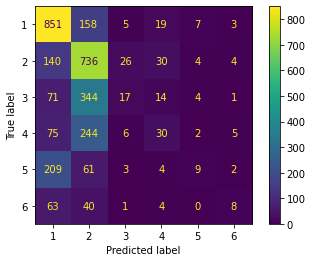

In [85]:
plot_confusion_matrix(ovr, X_test_tree, Y_test_tree)  
plt.show()

In [86]:
print('Exactitud: %.2f' % accuracy_score(Y_test_tree, Y_pred_tree))
print("Recall: {}".format(recall_score(Y_test_tree,Y_pred_tree, average='weighted', zero_division=1)))
print("Precisión: {}".format(precision_score(Y_test_tree,Y_pred_tree, average='weighted', zero_division=1)))
print("Puntuación F1: {}".format(f1_score(Y_test_tree,Y_pred_tree, average='weighted', zero_division=1)))

Exactitud: 0.52
Recall: 0.5159375
Precisión: 0.4521073377699153
Puntuación F1: 0.4310313896513749


In [87]:
# Mostrar reporte de clasificación
print(classification_report(Y_test_tree, Y_pred_tree, zero_division = 1))

              precision    recall  f1-score   support

           1       0.60      0.82      0.69      1043
           2       0.46      0.78      0.58       940
           3       0.29      0.04      0.07       451
           4       0.30      0.08      0.13       362
           5       0.35      0.03      0.06       288
           6       0.35      0.07      0.12       116

    accuracy                           0.52      3200
   macro avg       0.39      0.30      0.27      3200
weighted avg       0.45      0.52      0.43      3200

